In [21]:
from kervis.utils import Model
from kervis.utils import Dataset
from kervis.kernels import VertexHistogram, EdgeHistogram, ShortestPath, Graphlet, WeisfeilerLehman

In [22]:
MUTAG = Dataset("MUTAG")

In [23]:
VH = VertexHistogram()
VH_kmeans = Model(VH, MUTAG, "kmeans")
VH_SVM = Model(VH, MUTAG, "SVM")
VH_xgboost = Model(VH, MUTAG, "xgboost")

In [24]:
VH_kmeans.evaluate()
VH_SVM.evaluate()
VH_xgboost.evaluate()

              precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.88      0.81      0.84        26

    accuracy                           0.79        38
   macro avg       0.76      0.78      0.77        38
weighted avg       0.80      0.79      0.79        38

              precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.88      0.81      0.84        26

    accuracy                           0.79        38
   macro avg       0.76      0.78      0.77        38
weighted avg       0.80      0.79      0.79        38

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.88      0.88      0.88        26

    accuracy                           0.84        38
   macro avg       0.82      0.82      0.82        38
weighted avg       0.84      0.84      0.84        38



In [25]:
EH = EdgeHistogram()
EH_kmeans = Model(EH, MUTAG, "kmeans")
EH_SVM = Model(EH, MUTAG, "SVM")
EH_xgboost = Model(EH, MUTAG, "xgboost")

EH_kmeans.evaluate()
EH_SVM.evaluate()
EH_xgboost.evaluate()

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        12
           1       1.00      0.62      0.76        26

    accuracy                           0.74        38
   macro avg       0.77      0.81      0.73        38
weighted avg       0.86      0.74      0.74        38

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.85      0.88      0.87        26

    accuracy                           0.82        38
   macro avg       0.79      0.78      0.78        38
weighted avg       0.81      0.82      0.81        38

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.92      0.88      0.90        26

    accuracy                           0.87        38
   macro avg       0.84      0.86      0.85        38
weighted avg       0.87      0.87      0.87        38



In [26]:
SP = ShortestPath()

SP_kmeans = Model(SP, MUTAG, "kmeans")
SP_SVM = Model(SP, MUTAG, "SVM")
SP_xgboost = Model(SP, MUTAG, "xgboost")

SP_kmeans.evaluate()
SP_SVM.evaluate()
SP_xgboost.evaluate()

In [ ]:
GL = Graphlet()

GL_kmeans = Model(GL, MUTAG, "kmeans")
GL_SVM = Model(GL, MUTAG, "SVM")
GL_xgboost = Model(GL, MUTAG, "xgboost")

GL_kmeans.evaluate()
GL_SVM.evaluate()
GL_xgboost.evaluate()

In [ ]:
GL_xgboost.explain()

In [ ]:
GL_xgboost.bar_plot()

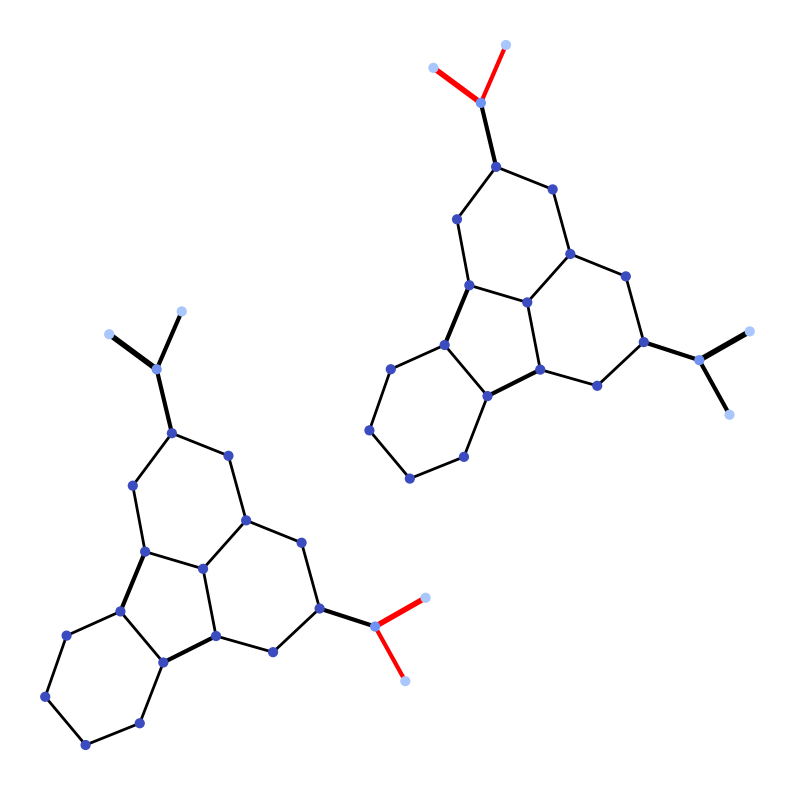

In [ ]:
GL_xgboost.highlight_features(1,0,node_size=40)